### Gender Wage Gap and Salary Prediction

[Berra Karayel] Capstone 2 Preprocessing and Training

In [14]:
#loading necessary modules

import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [2]:
#loading the cleaned salary data set

df = pd.read_csv("salary_cleaned.csv")

In [3]:
df.head()

,Unnamed: 0,Gender,Age,Country,Education,Major,Profession,Industry,Experience,Annual_Salary,target
0,2,Male,30-34,Oceania,Bachelor’s degree,Engineering (non-computer focused),Other,Manufacturing/Fabrication,5-10,"10-20,000",15000
1,3,Female,30-34,USA,Master’s degree,"Computer science (software engineering, etc.)",Data Scientist,I am a student,0-1,"0-10,000",5000
2,5,Male,22-24,India,Master’s degree,Mathematics or statistics,Data Analyst,I am a student,0-1,"0-10,000",5000
3,7,Male,35-39,South America,Doctoral degree,"Information technology, networking, or system ...",Other,Academics/Education,10-15,"10-20,000",15000
4,8,Male,18-21,India,Master’s degree,"Information technology, networking, or system ...",Other,Other,0-1,"0-10,000",5000


In [4]:
df["Gender"].value_counts(normalize=True)

Gender
Male                       0.834570
Female                     0.154367
Prefer not to say          0.008070
Prefer to self-describe    0.002994
Name: proportion, dtype: float64

In [5]:
df = df[df['Gender'] != "Prefer not to say"]
df = df[df['Gender'] != "Prefer to self-describe"]

In [6]:
df["Gender"].value_counts(normalize=True)

Gender
Male      0.843906
Female    0.156094
Name: proportion, dtype: float64

In [8]:
df = df.drop('Unnamed: 0', axis=1)

In [9]:
df.head()

,Gender,Age,Country,Education,Major,Profession,Industry,Experience,Annual_Salary,target
0,Male,30-34,Oceania,Bachelor’s degree,Engineering (non-computer focused),Other,Manufacturing/Fabrication,5-10,"10-20,000",15000
1,Female,30-34,USA,Master’s degree,"Computer science (software engineering, etc.)",Data Scientist,I am a student,0-1,"0-10,000",5000
2,Male,22-24,India,Master’s degree,Mathematics or statistics,Data Analyst,I am a student,0-1,"0-10,000",5000
3,Male,35-39,South America,Doctoral degree,"Information technology, networking, or system ...",Other,Academics/Education,10-15,"10-20,000",15000
4,Male,18-21,India,Master’s degree,"Information technology, networking, or system ...",Other,Other,0-1,"0-10,000",5000


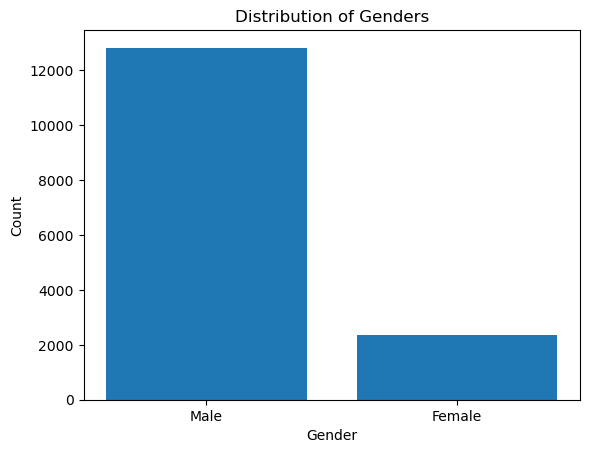

In [10]:
gender_counts = df['Gender'].value_counts()
plt.bar(gender_counts.index, gender_counts.values)
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Distribution of Genders')
plt.show()

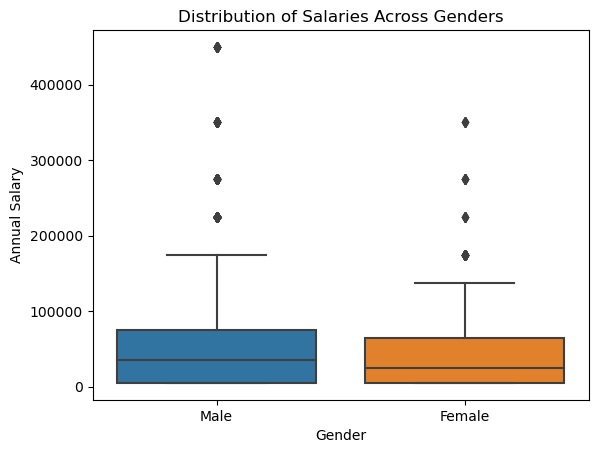

In [11]:
sns.boxplot(x='Gender', y='target', data=df)
plt.xlabel('Gender')
plt.ylabel('Annual Salary')
plt.title('Distribution of Salaries Across Genders')
plt.show()

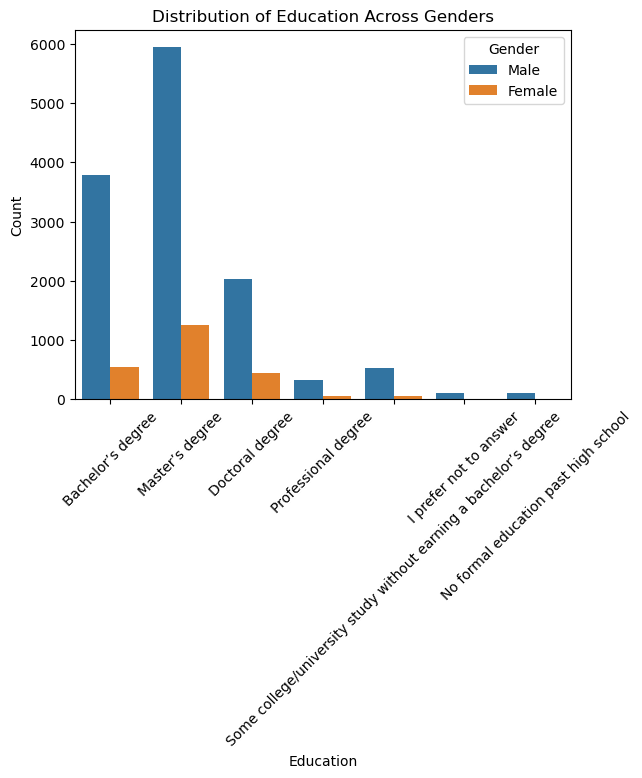

In [12]:
sns.countplot(x='Education', hue='Gender', data=df)
plt.xlabel('Education')
plt.ylabel('Count')
plt.title('Distribution of Education Across Genders')
plt.xticks(rotation=45)
plt.show()

          count          mean           std     min     25%      50%      75%  \
Gender                                                                          
Female   2372.0  43095.489039  46037.538191  5000.0  5000.0  25000.0  65000.0   
Male    12824.0  49720.835933  56411.449763  5000.0  5000.0  35000.0  75000.0   

             max  
Gender            
Female  350000.0  
Male    450000.0  


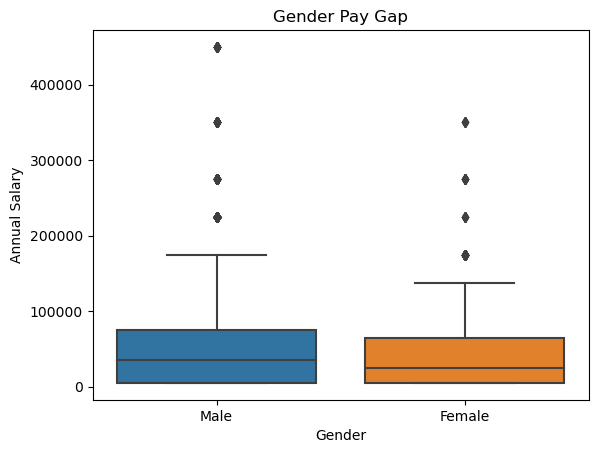

In [13]:
gender_pay_stats = df.groupby('Gender')['target'].describe()
print(gender_pay_stats)

sns.boxplot(x='Gender', y='target', data=df)
plt.xlabel('Gender')
plt.ylabel('Annual Salary')
plt.title('Gender Pay Gap')
plt.show()

In [20]:
# Separating features and target variable
X = df.drop(columns=['target'])  # Features
y = df['target']  # Target variable

# Defining categorical features
categorical_features = ['Gender', 'Age', 'Country', 'Education', 'Major', 'Profession', 'Industry', 'Experience', 'Annual_Salary']

# Creating preprocessing pipeline for categorical variables
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combining preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_features)
    ])

# Splitting data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocessing data
X_train_preprocessed = preprocessor.fit_transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)